### Name : Mehraiel Mina
### Group 2 Smart

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sys import platform

### Show Images

170508288/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


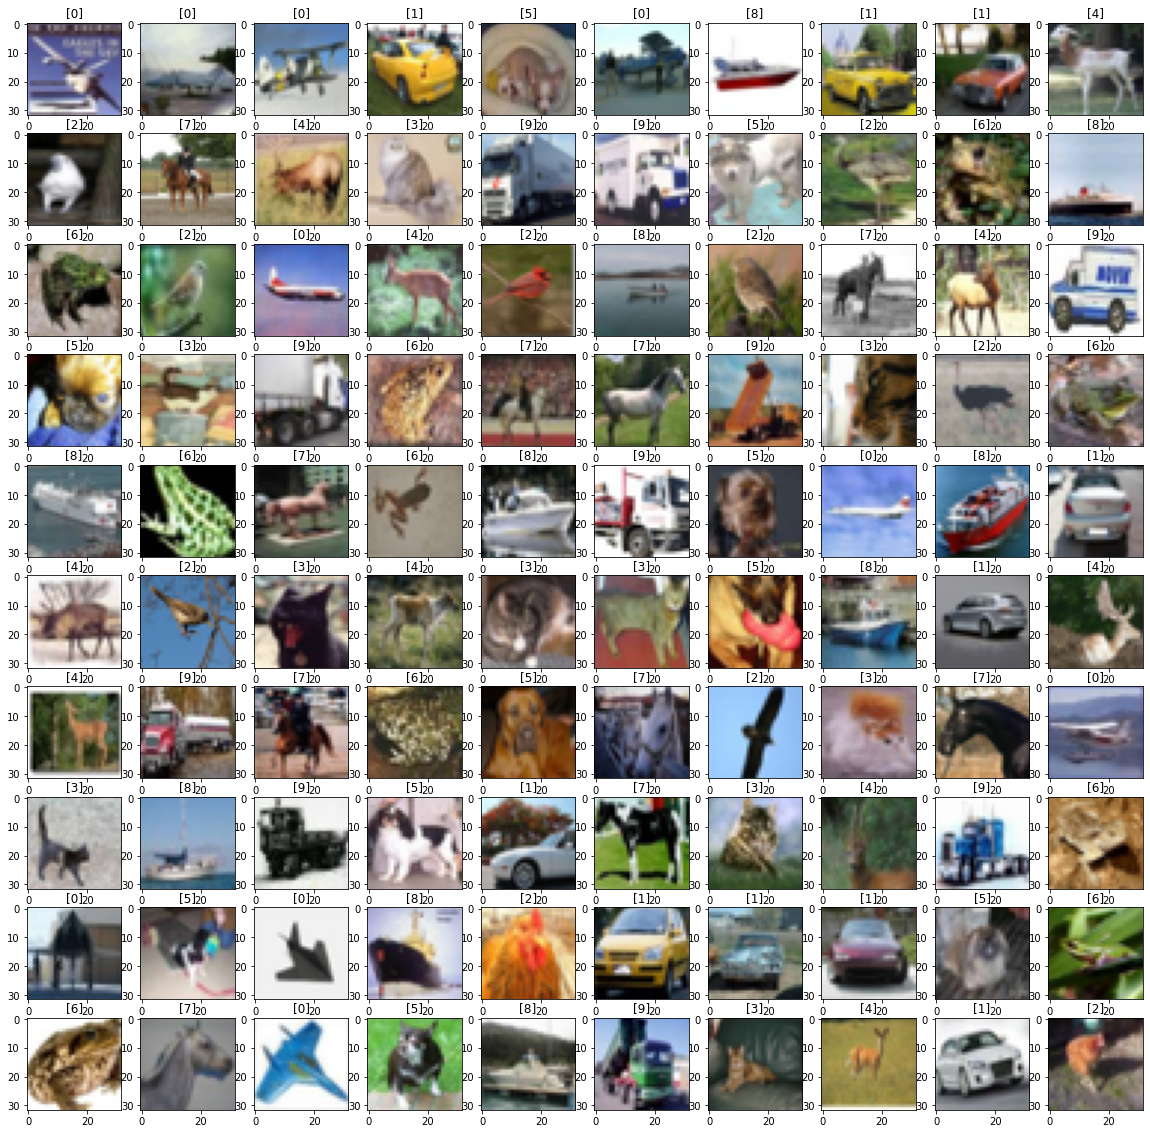

In [2]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_imgs,train_labels,test_size=100,stratify=train_labels)

fig, ax = plt.subplots(10, 10,figsize=(20, 20))
x_k = 0

for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_val[x_k], aspect='auto')
        ax[i][j].title.set_text(y_val[x_k])
        x_k += 1
 
plt.show()

### number of images per class
- Train

In [15]:
classes , counts = np. unique(train_labels, return_counts=True)
print(classes)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


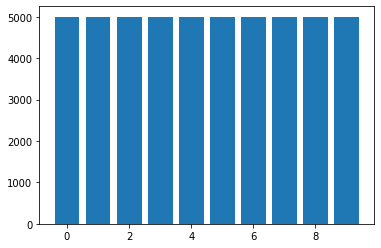

In [16]:
plt.bar(classes, counts)
plt.show()

- Test

In [17]:
classes , counts = np. unique(test_labels, return_counts=True)
print(classes)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


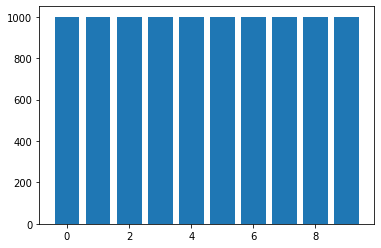

In [18]:
plt.bar(classes, counts)
plt.show()

### without validation

In [3]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()

In [ ]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_imgs= train_imgs.reshape((50000, 32 * 32 * 3))
train_imgs = train_imgs.astype('float32') / 255

test_imgs = test_imgs.reshape((10000, 32 * 32 * 3))
test_imgs = test_imgs.astype('float32') / 255

In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)



(50000, 3072)
(10000, 3072)


In [ ]:
train_labels = to_categorical(train_labels)
print(train_labels.shape)



(50000, 10)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',name='layer1',input_shape=(32*32*3,)))
network.add(layers.Dense(256,activation='relu',name='layer2'))
network.add(layers.Dense(128,activation='relu',name='layer3'))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
network.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
network.fit(train_imgs,train_labels,batch_size=265,epochs=15)

Epoch 1/15
189/189 [==============================] - 18s 88ms/step - loss: 1.9321 - accuracy: 0.3054
Epoch 2/15
189/189 [==============================] - 12s 65ms/step - loss: 1.7031 - accuracy: 0.3881
Epoch 3/15
189/189 [==============================] - 9s 46ms/step - loss: 1.6148 - accuracy: 0.4211
Epoch 4/15
189/189 [==============================] - 9s 45ms/step - loss: 1.5377 - accuracy: 0.4522
Epoch 5/15
189/189 [==============================] - 9s 45ms/step - loss: 1.5080 - accuracy: 0.4630
Epoch 6/15
189/189 [==============================] - 9s 46ms/step - loss: 1.4544 - accuracy: 0.4807
Epoch 7/15
189/189 [==============================] - 15s 81ms/step - loss: 1.4285 - accuracy: 0.4908
Epoch 8/15
189/189 [==============================] - 12s 64ms/step - loss: 1.4006 - accuracy: 0.5015
Epoch 9/15
189/189 [==============================] - 9s 46ms/step - loss: 1.3699 - accuracy: 0.5113
Epoch 10/15
189/189 [==============================] - 9s 46ms/step - loss: 1.3396 - ac

### with validation


In [ ]:
(train_x,train_y) , (test_imgs,test_labels) = cifar10.load_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

In [ ]:
print(train_imgs.shape)
print(train_labels.shape)
print(valid_imgs.shape)
print(valid_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_imgs= train_imgs.reshape((40000, 32 * 32 * 3))
train_imgs = train_imgs.astype('float32') / 255

valid_imgs= valid_imgs.reshape((10000, 32 * 32 * 3))
valid_imgs = valid_imgs.astype('float32') / 255

test_imgs = test_imgs.reshape((10000, 32 * 32 * 3))
test_imgs = test_imgs.astype('float32') / 255

In [ ]:
print(train_imgs.shape)
print(valid_imgs.shape)
print(test_imgs.shape)



(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
train_labels = to_categorical(train_labels)
print(train_labels.shape)

valid_labels = to_categorical(valid_labels)
print(valid_labels.shape)


(40000, 10)
(10000, 10)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',name='layer1',input_shape=(32*32*3,)))
network.add(layers.Dense(256,activation='relu',name='layer2'))
network.add(layers.Dense(128,activation='relu',name='layer3'))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


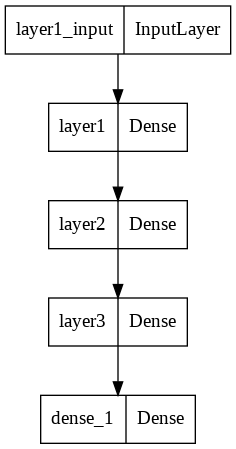

In [ ]:
plot_model(network)

In [ ]:
network.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = network.fit(train_imgs,train_labels,batch_size=256,epochs=15,validation_data=(valid_imgs,valid_labels))

Epoch 1/15
157/157 [==============================] - 8s 51ms/step - loss: 2.0082 - accuracy: 0.2801 - val_loss: 1.8373 - val_accuracy: 0.3482
Epoch 2/15
157/157 [==============================] - 8s 50ms/step - loss: 1.7810 - accuracy: 0.3689 - val_loss: 1.7543 - val_accuracy: 0.3764
Epoch 3/15
157/157 [==============================] - 8s 50ms/step - loss: 1.6720 - accuracy: 0.4036 - val_loss: 1.6423 - val_accuracy: 0.4104
Epoch 4/15
157/157 [==============================] - 8s 49ms/step - loss: 1.6155 - accuracy: 0.4249 - val_loss: 1.7065 - val_accuracy: 0.3883
Epoch 5/15
157/157 [==============================] - 13s 81ms/step - loss: 1.5589 - accuracy: 0.4484 - val_loss: 1.5709 - val_accuracy: 0.4235
Epoch 6/15
157/157 [==============================] - 8s 49ms/step - loss: 1.5234 - accuracy: 0.4564 - val_loss: 1.5469 - val_accuracy: 0.4410
Epoch 7/15
157/157 [==============================] - 8s 49ms/step - loss: 1.4735 - accuracy: 0.4783 - val_loss: 1.5125 - val_accuracy: 0.457

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

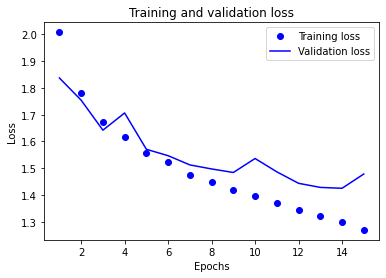

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

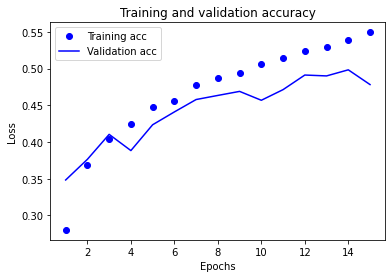

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## without normalize

In [ ]:
(train_x,train_y) , (test_imgs,test_labels) = cifar10.load_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

In [ ]:
train_imgs= train_imgs.reshape((40000, 32 * 32 * 3))

valid_imgs= valid_imgs.reshape((10000, 32 * 32 * 3))

test_imgs = test_imgs.reshape((10000, 32 * 32 * 3))


In [ ]:
print(train_imgs.shape)
print(valid_imgs.shape)
print(test_imgs.shape)



(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
train_labels = to_categorical(train_labels)
print(train_labels.shape)

valid_labels = to_categorical(valid_labels)
print(valid_labels.shape)


(40000, 10)
(10000, 10)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',name='layer1',input_shape=(32*32*3,)))
network.add(layers.Dense(256,activation='relu',name='layer2'))
network.add(layers.Dense(128,activation='relu',name='layer3'))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = network.fit(train_imgs,train_labels,batch_size=256,epochs=15,validation_data=(valid_imgs,valid_labels))

Epoch 1/15
157/157 [==============================] - 11s 64ms/step - loss: 87.2926 - accuracy: 0.1673 - val_loss: 10.6003 - val_accuracy: 0.2218
Epoch 2/15
157/157 [==============================] - 8s 50ms/step - loss: 8.9157 - accuracy: 0.2283 - val_loss: 5.3909 - val_accuracy: 0.2483
Epoch 3/15
157/157 [==============================] - 8s 50ms/step - loss: 5.3858 - accuracy: 0.2355 - val_loss: 4.0327 - val_accuracy: 0.2447
Epoch 4/15
157/157 [==============================] - 8s 51ms/step - loss: 2.9200 - accuracy: 0.2740 - val_loss: 2.9347 - val_accuracy: 0.2590
Epoch 5/15
157/157 [==============================] - 8s 51ms/step - loss: 2.5784 - accuracy: 0.2898 - val_loss: 2.3802 - val_accuracy: 0.2969
Epoch 6/15
157/157 [==============================] - 8s 50ms/step - loss: 2.2981 - accuracy: 0.3086 - val_loss: 2.5766 - val_accuracy: 0.3084
Epoch 7/15
157/157 [==============================] - 8s 50ms/step - loss: 2.1418 - accuracy: 0.3250 - val_loss: 2.1081 - val_accuracy: 0.3

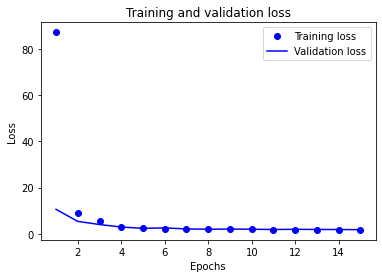

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

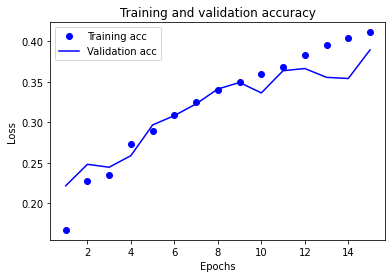

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### using sparse categorical crossentropy

In [ ]:
(train_x,train_y) , (test_imgs,test_labels) = cifar10.load_data()

In [ ]:
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

In [ ]:
print(train_imgs.shape)
print(train_labels.shape)
print(valid_imgs.shape)
print(valid_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_imgs= train_imgs.reshape((40000, 32 * 32 * 3))
train_imgs = train_imgs.astype('float32') / 255

valid_imgs= valid_imgs.reshape((10000, 32 * 32 * 3))
valid_imgs = valid_imgs.astype('float32') / 255

test_imgs = test_imgs.reshape((10000, 32 * 32 * 3))
test_imgs = test_imgs.astype('float32') / 255

In [ ]:
print(train_imgs.shape)
print(valid_imgs.shape)
print(test_imgs.shape)



(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',name='layer1',input_shape=(32*32*3,)))
network.add(layers.Dense(256,activation='relu',name='layer2'))
network.add(layers.Dense(128,activation='relu',name='layer3'))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


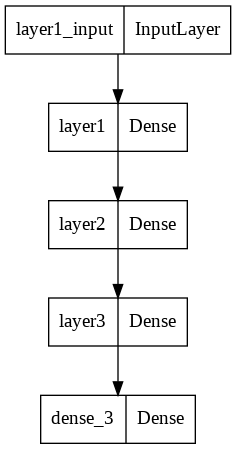

In [ ]:
plot_model(network)

In [ ]:
network.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [ ]:
history = network.fit(train_imgs,train_labels,batch_size=256,epochs=15,validation_data=(valid_imgs,valid_labels))

Epoch 1/15
157/157 [==============================] - 15s 85ms/step - loss: 1.9619 - accuracy: 0.2891 - val_loss: 1.8007 - val_accuracy: 0.3477
Epoch 2/15
157/157 [==============================] - 8s 49ms/step - loss: 1.7390 - accuracy: 0.3791 - val_loss: 1.7255 - val_accuracy: 0.3732
Epoch 3/15
157/157 [==============================] - 8s 49ms/step - loss: 1.6600 - accuracy: 0.4074 - val_loss: 1.6718 - val_accuracy: 0.3939
Epoch 4/15
157/157 [==============================] - 8s 49ms/step - loss: 1.5922 - accuracy: 0.4326 - val_loss: 1.6450 - val_accuracy: 0.4207
Epoch 5/15
157/157 [==============================] - 8s 49ms/step - loss: 1.5421 - accuracy: 0.4530 - val_loss: 1.5637 - val_accuracy: 0.4336
Epoch 6/15
157/157 [==============================] - 8s 49ms/step - loss: 1.5060 - accuracy: 0.4606 - val_loss: 1.5551 - val_accuracy: 0.4394
Epoch 7/15
157/157 [==============================] - 9s 56ms/step - loss: 1.4688 - accuracy: 0.4778 - val_loss: 1.5318 - val_accuracy: 0.459

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

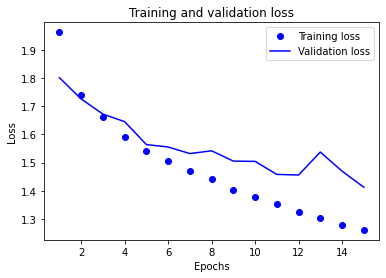

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

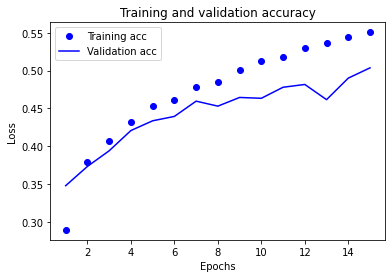

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()